In [1]:
import pandas as pd
import numpy as np
import yfinance as yf

In [2]:
data = yf.download("TCS.NS", start="2021-01-01")

[*********************100%***********************]  1 of 1 completed


In [6]:
df = data.copy()
a = 12
b = 26
c = 9

In [7]:
df["MA_Fast"] = df["Close"].ewm(span=a, min_periods=a).mean()
df["MA_Slow"] = df["Close"].ewm(span=b, min_periods=b).mean()
df["MACD"] = df["MA_Fast"] - df["MA_Slow"]
df["Signal"] = df["MACD"].ewm(span=c, min_periods=c).mean()

In [9]:
df.dropna(inplace=True)

In [12]:
df['MACD_Signal'] = np.where(df['MACD'] > df['Signal'], 1.0, 0.0) 

<AxesSubplot:xlabel='Date'>

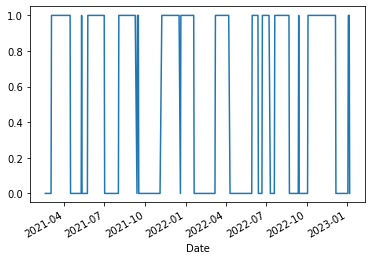

In [19]:
df['MACD_Signal'].plot()

In [14]:
df['MACD_Buy_Sell_Signal'] = df['MACD_Signal'].diff()

<AxesSubplot:xlabel='Date'>

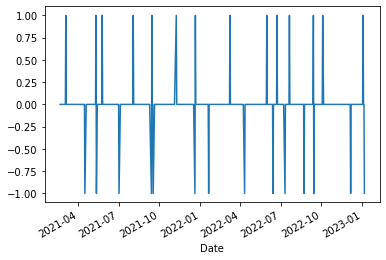

In [18]:
df['MACD_Buy_Sell_Signal'].plot()